## 1. Example of Using Model 1 (Table Detection)

Table detection model sucessfully loaded

 (1328, 1240, 3)


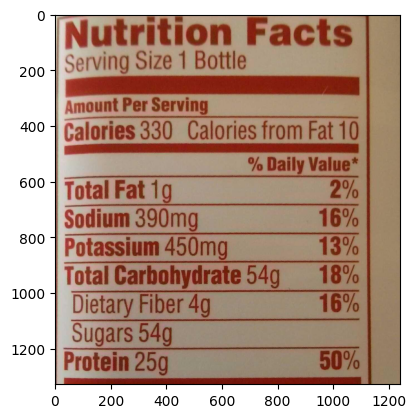

In [5]:
import table_detector  as table_detector # Tabel detector module
import matplotlib.pyplot as plt

# Load the model
detection_model = table_detector.get_model('deployment/assets/model/table-detection-model')

# Get the cropped table
image_path = 'testing_image/test_image2.jpg'
table = table_detector.get_table(image_path, detection_model)

# Show the result for testing
print('\n',table.shape)
plt.imshow(table)
plt.show()

## 2. Example of Using Model 2 (Text Detection)

Successfully loaded text detection model
1/1 [==============================] - 1s 900ms/step
3277 text boxes before nms
net 1196ms, restore 10ms, nms 725ms
[timing] 1.9313275814056396
1/1 [==============================] - 0s 37ms/step
2413 text boxes before nms
net 101ms, restore 3ms, nms 685ms
[timing] 0.7996025085449219


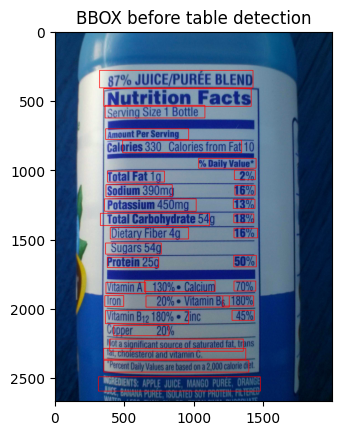

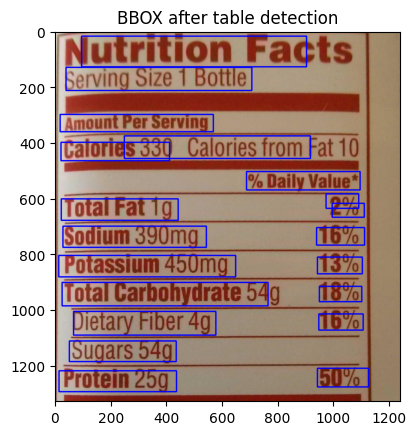

In [6]:
from text_detector import TextDetector
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("testing_image/test_image2.jpg")
text_detector = TextDetector("deployment/assets/model/text-detection-model")

bbox_from_table = text_detector.detect_text(table)
bbox = text_detector.detect_text(img)

for index, row in bbox_from_table.iterrows():
    x, y, w, h = row['x'], row['y'], row['w'], row['h']
    cv2.rectangle(table, (x, y), (x + w, y + h), (0, 0, 255), 3)

for index, row in bbox.iterrows():
    x, y, w, h = row['x'], row['y'], row['w'], row['h']
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)


plt.imshow(img)
plt.title("BBOX before table detection")
plt.show()

plt.imshow(table)
plt.title("BBOX after table detection")
plt.show()

## 3. Example of Using Model 3 (OCR)

In [6]:
import ocr_doctr as ocr # OCR module
import pandas as pd

# Load the model
ocr_model = ocr.get_model('model/ocr-model/crnn_mobilenet_v3_large_20241209-014828.pt')

# Load the image and preprocess it
table = ocr.load_image_into_numpy_array('testing_image/test_image2.jpg')

# Load words bounding box
table_words_bbox = pd.read_csv('testing_image/test_image2_bbox.csv')

# Get the text list
text_list = ocr.text_list(table, table_words_bbox, ocr_model)

print('\nText list from the image:\n', text_list)

c:\Users\farra\Documents\Materi Kuliah\Semester 7\Bangkit\capstone\mlteam-workspace\ocr_model\ocr_doctr.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  reco_params = to

OCR model sucessfully loaded

Text list from the image:
 ['STJUICEPUREEBLENI', 'NutritionFacis', 'SaningSize1Botie', 'InountPerServing', 'Jaries331GalbriasfromFa', '%DailyValue*', 'TotalFat1g', '2%', 'Sodium390mg', '16%', 'Potassium450m', '13%', 'TotalCarbohytrate54', '18%', 'DietaryFiber4g', '16%', 'Sugars54g', 'Protein25g', '50%', 'VitaminA', '130%Calcium', '70%', 'Iron', '20%ViaminBs', '180%', 'VitaminB,180%Z', '45%', 'pper', 'Jhngizarguradaturakat1', 'Ed/katudaditurit', 'Toahyjizmizmn1laind', 'SOEnRRLJZEIULGITVENE', 'KJAPAELGLGARALS']
